In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import os
import tensorflow as tf

In [1]:
import yfinance as yf

msft = yf.Ticker("MSFT")

In [54]:
msft.history(period='2y')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-11-06,104.528742,105.949974,103.457952,104.859718,24340200,0.0,0
2018-11-07,106.534046,109.259693,106.495107,108.987129,37901700,0.0,0
2018-11-08,108.831383,109.230492,107.965015,108.782707,25644100,0.0,0
2018-11-09,107.906594,108.490661,105.872094,106.660583,32039200,0.0,0
2018-11-12,106.514589,107.040251,103.282744,104.032303,33621800,0.0,0
...,...,...,...,...,...,...,...
2020-10-30,203.500000,204.289993,199.619995,202.470001,36953700,0.0,0
2020-11-02,204.289993,205.279999,200.119995,202.330002,30842200,0.0,0
2020-11-03,203.889999,208.119995,203.119995,206.429993,27512000,0.0,0


In [39]:
df = msft.history(period='2y')['Open'].values
df = df.reshape(-1,1)

In [40]:
df

array([[104.52874246],
       [106.53404595],
       [108.83138254],
       [107.90659442],
       [106.51458871],
       [104.69423666],
       [105.68422542],
       [102.64372811],
       [104.68702889],
       [105.8504309 ],
       [ 99.52502721],
       [101.28478795],
       [ 99.886751  ],
       [102.44820364],
       [103.89512146],
       [105.47892839],
       [107.86440219],
       [108.22612414],
       [110.47472743],
       [109.43841019],
       [103.45518635],
       [105.95797183],
       [102.45796454],
       [107.34623499],
       [108.41187482],
       [107.13115079],
       [105.83087387],
       [103.05434845],
       [101.4314378 ],
       [101.33368048],
       [100.7470865 ],
       [ 99.35880194],
       [ 95.4970897 ],
       [ 93.01385434],
       [ 97.08090019],
       [ 99.80853635],
       [ 99.02641416],
       [ 97.32530025],
       [ 97.86300917],
       [ 97.49150384],
       [ 99.36859309],
       [100.73730478],
       [101.5389781 ],
       [100

In [41]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])
print(dataset_train.shape)
print(dataset_test.shape)

(403, 1)
(151, 1)


In [42]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:7]

array([[0.11555283],
       [0.13567621],
       [0.15873017],
       [0.14944985],
       [0.13548096],
       [0.11721358],
       [0.1271482 ]])

In [43]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:7]

array([[0.61497388],
       [0.66708544],
       [0.75962853],
       [0.72049488],
       [0.72738329],
       [0.70731746],
       [0.75373863]])

In [44]:
def create_my_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i,0])
        y.append(df[i,0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [45]:
x_train, y_train = create_my_dataset(dataset_train)
x_train[:1]

array([[0.11555283, 0.13567621, 0.15873017, 0.14944985, 0.13548096,
        0.11721358, 0.1271482 , 0.09663656, 0.11714125, 0.12881608,
        0.06534015, 0.08299949, 0.06897007, 0.09467446, 0.10919439,
        0.12508802, 0.14902645, 0.15265635, 0.17522127, 0.16482174,
        0.10477961, 0.12989526, 0.09477241, 0.1438266 , 0.15452038,
        0.14166821, 0.12861983, 0.10075717, 0.08447113, 0.08349013,
        0.07760361, 0.06367206, 0.02491947, 0.        , 0.04081313,
        0.06818518, 0.06033652, 0.04326571, 0.04866166, 0.04493357,
        0.06377032, 0.07750545, 0.0855503 , 0.0792715 , 0.07897709,
        0.06632113, 0.07230583, 0.0992855 , 0.09673463, 0.12086926]])

In [46]:
y_train[:1]

array([0.11390358])

In [47]:
x_test, y_test = create_my_dataset(dataset_test)
x_test[:1]

array([[0.61497388, 0.66708544, 0.75962853, 0.72049488, 0.72738329,
        0.70731746, 0.75373863, 0.77570135, 0.80664887, 0.85856096,
        0.82990954, 0.79866249, 0.77759816, 0.80475211, 0.78428677,
        0.82951013, 0.81952706, 0.79586719, 0.86355237, 0.82162366,
        0.80854572, 0.86974189, 0.88431733, 0.90518193, 0.91326801,
        0.89499905, 0.93143729, 0.88900931, 0.83899398, 0.85416833,
        0.92095504, 0.91376726, 0.91670933, 0.9226158 , 0.90049179,
        0.93202607, 0.87055925, 0.87596524, 0.8958867 , 0.8939847 ,
        0.91110334, 0.91680963, 0.91160383, 0.89478554, 0.92802179,
        0.94864411, 0.97997831, 1.        , 0.97407175, 0.91440693]])

In [48]:
#reshaping for LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
print(x_train.shape)
print(x_test.shape)


(353, 50, 1)
(101, 50, 1)


In [49]:
tf.logging.set_verbosity(tf.logging.ERROR)
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 96)            37632     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 96)            74112     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 96)                74112     
_________________________________________________________________
dropout_3 (Dropout)          (None, 96)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [50]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [51]:
if(not os.path.exists('C:\code\ML\stock_prediction.h5')):
    model.fit(x_train, y_train, epochs=50, batch_size=32)
    model.save('C:\code\ML\stock_prediction.h5')

Epoch 1/50
353/353 [==============================] - 2s 4ms/step - loss: 0.0795
Epoch 2/50
353/353 [==============================] - 1s 2ms/step - loss: 0.0128
Epoch 3/50
353/353 [==============================] - 1s 2ms/step - loss: 0.0100
Epoch 4/50
353/353 [==============================] - 1s 2ms/step - loss: 0.0073
Epoch 5/50
353/353 [==============================] - 1s 2ms/step - loss: 0.0075
Epoch 6/50
353/353 [==============================] - 1s 2ms/step - loss: 0.0073
Epoch 7/50
353/353 [==============================] - 1s 2ms/step - loss: 0.0069
Epoch 8/50
353/353 [==============================] - 1s 2ms/step - loss: 0.0062
Epoch 9/50
353/353 [==============================] - 1s 2ms/step - loss: 0.0057
Epoch 10/50
353/353 [==============================] - 1s 2ms/step - loss: 0.0048
Epoch 11/50
353/353 [==============================] - 1s 2ms/step - loss: 0.0063
Epoch 12/50
353/353 [==============================] - 1s 2ms/step - loss: 0.0046
Epoch 13/50
353/353 [====

range(403, 504)


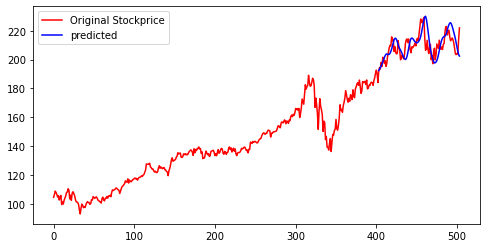

In [52]:
#visualizing our predictions
%matplotlib inline
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df, color='red', label='Original Stockprice')
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions,color='blue',label='predicted')
plt.legend()
print(range(len(y_train)+50,len(y_train)+50+len(predictions)))

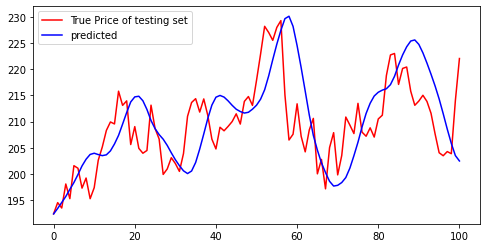

In [53]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1,1))

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label='True Price of testing set')
plt.plot(predictions,color='blue',label='predicted')
plt.legend()